# 앙상블(=메타러닝, 모델결합)

- 하나의 모델만을 학습시켜 사용하지 않고 여러 모델을 학습시켜 결합하는 방식으로 문제를 처리함.


- 장점

  1. 성능을 분삭시키기 때문에 과적합 감소 효과가 있음
  2. 개별 모델 성능이 잘 안나올 때 앙상블 학습을 이용하면 성능이 향상될 수 있음

# 앙상블 학습의 유형 

## 1. voting classifier
- 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
- 서로 다른 알고리즘을 가진 분류기를 결합하는 것, 같은 sample 가지고 계속 학습
  - **서로 다른 머신러닝 알고리즘 모델을 학습시킨 후 새로운 데이터(test data)에 대해 각 모델의 예측값을 가지고 다수결 투표를 통해 최종 클래스를 예측**

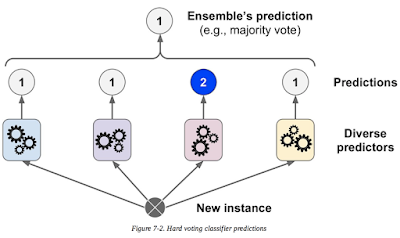

### voting 유형

1. 하드 보팅
 - 다수결 원칙과 비슷
 - 예측한 결과값들 중 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정하는 것
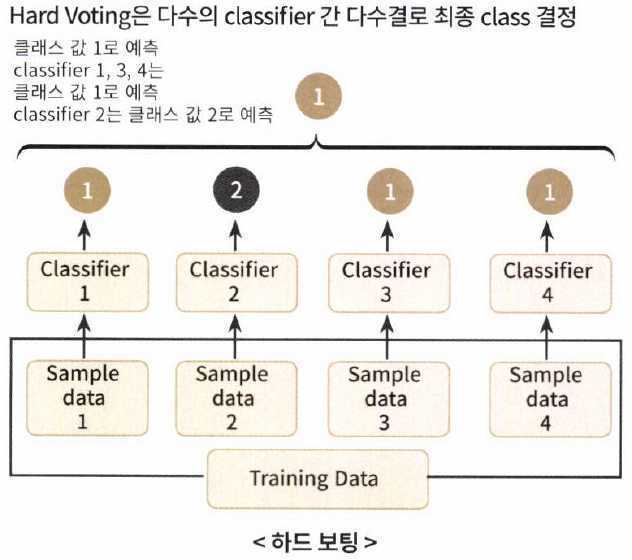

2. 소프트 보팅
 - 분류기들의 레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정
 - 일반적으로 하드 보팅보다 예측 성능이 좋아서 더 많이 사용됨
 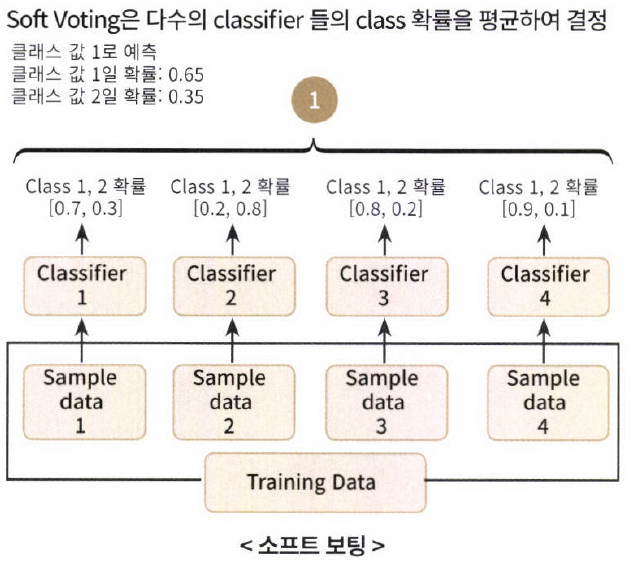

--------------------------------------------------------

## Voting 코드

In [2]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [2]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='soft' )
# estimators는 리스트 값으로 보팅에 사용될 여러 개의 classifier 객체들을 튜플 형식으로 받음

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9561
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 소프트 보팅이니 하드 보팅으로 바꿔서 돌려봅시다

In [3]:
# 개별 모델은 로지스틱 회귀와 KNN 임. 
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기 
vo_clf = VotingClassifier( estimators=[('LR',lr_clf),('KNN',knn_clf)] , voting='hard' )
# estimators는 리스트 값으로 보팅에 사용될 여러 개의 classifier 객체들을 튜플 형식으로 받음

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    test_size=0.2 , random_state= 156)

# VotingClassifier 학습/예측/평가. 
vo_clf.fit(X_train , y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

# 개별 모델의 학습/예측/평가.
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train , y_train)
    pred = classifier.predict(X_test)
    class_name= classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test , pred)))

Voting 분류기 정확도: 0.9298
LogisticRegression 정확도: 0.9474
KNeighborsClassifier 정확도: 0.9386


C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


- **보팅으로 여러 개의 기반 분류기를 결합한다고 해서 무조건 기반 분류기보다 예측 성능이 향상되지 않다**

- **전반적으로는 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많음**

--------------------------------------------------------------

## 2. Bagging
 - 여러 개의 분류기가 투표를 통해 최종 예측 결과를 결정하는 방식
 - 각각의 분류기가 모두 같은 유형의 알고리즘 기반
 - 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보팅을 수행함
 - 대표적인 모델 : 랜덤 포레스트
 - 부트스트래핑 분할 방식 : 개별 classifier에게 데이터를 샘플링해서 추출하는 방식
 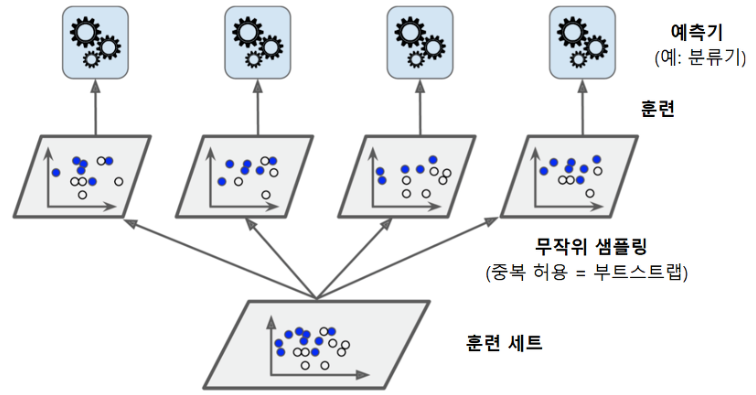

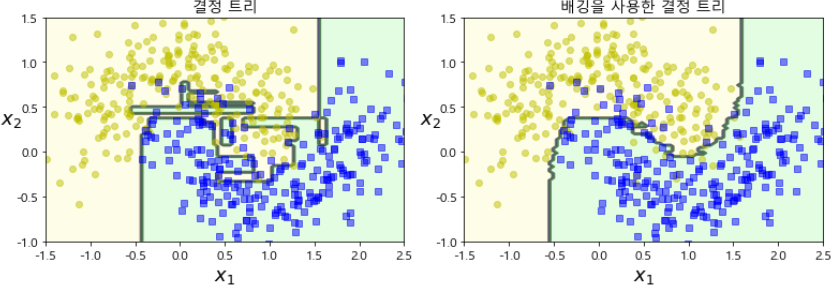

### Bagging vs Pasting
1. Bagging : 훈련 세트에서 중복을 허용하여 샘플링하는 방식
2. 페이스팅 : 중복을 허용하지 않고 샘플링하는 방식

 - 데이터가 많아지면 둘의 차이가 없다

-----------------------------------------------------------------------

## 3. Boosting
 - 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서는 올바르게 예측할 수 있도록 다음 분류기에게는 가중치를 부여하면서 학습과 예측을 진행하는 것(좋아질 때까지 무한 반복)
 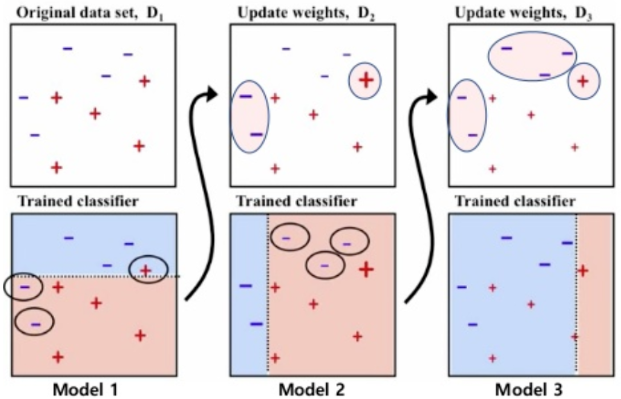

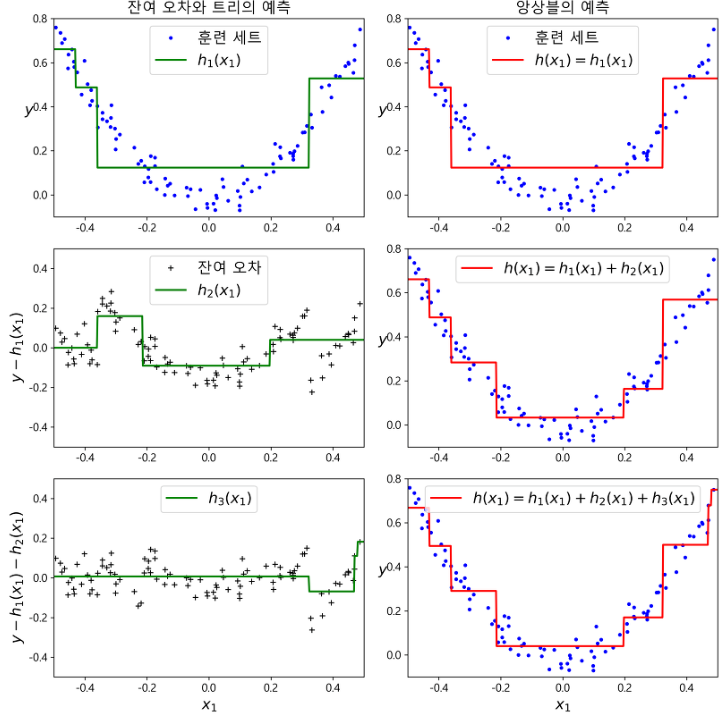

## 4. staking
 - 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어서 다른 모델로 재학습시켜 결과를 예측하는 방법??
 - 앙상블에 속한 모든 예측기의 예측을 취합하는 모델을 훈련시키는 방법
 - 블렌더 : 여러 예측기의 값들을 입력으로 받아 최종 예측을 만든다.
 - 블렌딩 예측기를 사용한 예측 취합

### 스태킹 앙상블의 기본 구조
 - 원본 데이터의 train, test가 존재
 - 원본 training data를 3개의 머신러닝 모델이 학습
 - 각 모델마다 X_test를 넣어서 예측 후 predict를 뽑아냄(3개의 predict된 값)
 - 3개의 predict를 다시 학습 데이터로 사용
 - 최종 model을 하나 선정해 학습
 - 최종 평가
 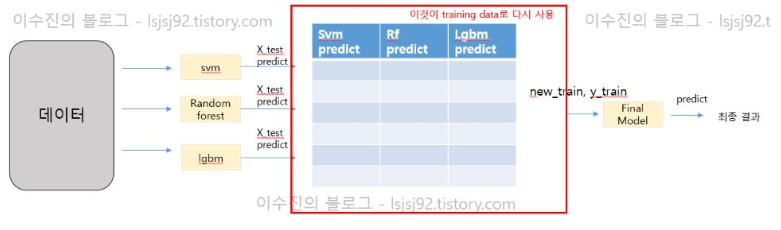

------------------------------------------------------------------------

### 코드

In [20]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import numpy as np
data=load_breast_cancer()
X_data=data.data
y_data=data.target
X_train,X_test,y_train,y_test=train_test_split(X_data,y_data,test_size=0.2,
                                               random_state=0)

In [8]:
#개별 모델들
svm=SVC(random_state=0)
rf=RandomForestClassifier(n_estimators=100,random_state=0)
lr=LogisticRegression()

#최종 모델
lgbm=LGBMClassifier()

In [9]:
svm.fit(X_train,y_train)
rf.fit(X_train,y_train)
lr.fit(X_train,y_train)

C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\user\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
svm_pred=svm.predict(X_test)
rf_pred=rf.predict(X_test)
lr_pred=lr.predict(X_test)
print("svm : {0:.4f}, rf:{1:.4f}, lr:{2:.4f}".
      format(accuracy_score(y_test,svm_pred),accuracy_score(y_test,rf_pred),accuracy_score(y_test,lr_pred)))

svm : 0.5877, rf:0.9649, lr:0.9561


In [21]:
new_data=np.array([svm_pred,rf_pred,lr_pred])
print(new_data.shape)
new_data=np.transpose(new_data)

(3, 114)


In [22]:
lgbm.fit(new_data,y_test)
lgbm_pred=lgbm.predict(new_data)
print("Accuracy:{0:.4f}".format(accuracy_score(y_test,lgbm_pred)))

Accuracy:0.9825


-----------------------------------------------------------------------

# Summary

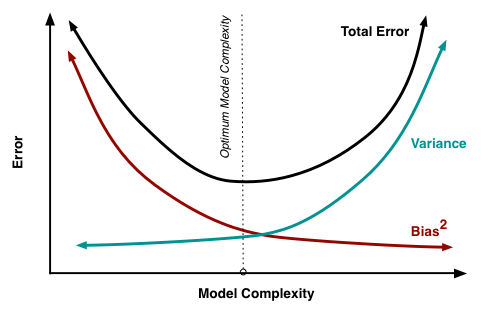